<a href="https://colab.research.google.com/github/GerardoMunoz/robots/blob/main/2_Join_Arm_Jacobian.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 2-Joint Planar Robot Arm: Linear Algebra and Applications

## 1. Direct Kinematics

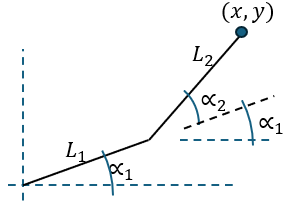





We define a planar robotic arm with two revolute joints and two links of fixed lengths $L_1$ and $L_2$. The joint angles are $\alpha_1$ and $\alpha_2$, and the end-effector position $(x, y)$ is given by:

$$
x(\alpha_1, \alpha_2) = L_1 \cos(\alpha_1) + L_2 \cos(\alpha_1 + \alpha_2)
$$

$$
y(\alpha_1, \alpha_2) = L_1 \sin(\alpha_1) + L_2 \sin(\alpha_1 + \alpha_2)
$$

This is a **nonlinear** function from joint space $\mathbb{R}^2$ to Cartesian space $\mathbb{R}^2$.

---

## 2.  Jacobian Matrix

The **Jacobian matrix** $J(\alpha_1, \alpha_2)$ is the partial derivative of the end-effector position with respect to the joint angles:

$$
J(\alpha_1, \alpha_2) =
\begin{bmatrix}
\frac{\partial x}{\partial \alpha_1} & \frac{\partial x}{\partial \alpha_2} \\
\frac{\partial y}{\partial \alpha_1} & \frac{\partial y}{\partial \alpha_2}
\end{bmatrix}
=
\begin{bmatrix}
- L_1 \sin(\alpha_1) - L_2 \sin(\alpha_1 + \alpha_2) & -L_2 \sin(\alpha_1 + \alpha_2) \\
L_1 \cos(\alpha_1) + L_2 \cos(\alpha_1 + \alpha_2) & L_2 \cos(\alpha_1 + \alpha_2)
\end{bmatrix}
$$

This Jacobian defines a **linear transformation** that maps joint velocities $\dot{\alpha}$ to end-effector velocities $\dot{x}, \dot{y}$:

$$
\begin{bmatrix}
\dot{x} \\
\dot{y}
\end{bmatrix}
= J(\alpha_1, \alpha_2)
\begin{bmatrix}
\dot{\alpha}_1 \\
\dot{\alpha}_2
\end{bmatrix}
$$

This Jacobian maps joint velocities $ [\dot{\alpha}_1, \dot{\alpha}_2] $ to end-effector velocities $ [\dot{x}, \dot{y}] $.


### Example:


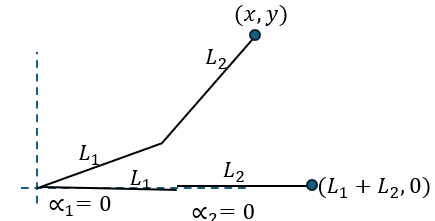





Let $ \alpha_1 = 0 $, $ \alpha_2 = 0 $, and $ L_1 = L_2 = 1 $. Then:

$$
J =
\begin{bmatrix}
0 & 0 \\
2 & 1
\end{bmatrix}
$$


---

## 3. Image of the Jacobian

The **image** of $J$ is the set of all Cartesian velocities $(\dot{x}, \dot{y})$ that the end-effector can achieve through some joint velocity $(\dot{\alpha}_1, \dot{\alpha}_2)$.

This is equivalent to the **column space** of $J$, and its dimension tells how many **independent directions** the end-effector can move in at that configuration.

### Example:

Let $\alpha_1 = 0, \alpha_2 = 0, L_1 = L_2 = 1$. Then:

$$
J =
\begin{bmatrix}
0 & 0 \\
2 & 1
\end{bmatrix}
$$

Then:

$$
\begin{bmatrix}
\dot{x} \\
\dot{y}
\end{bmatrix}
=
\begin{bmatrix}
0 \\
2\dot{\alpha}_1 + \dot{\alpha}_2
\end{bmatrix}
$$

So:

- $\dot{x} = 0$
- $\dot{y} = 2\dot{\alpha}_1 + \dot{\alpha}_2$

Hence:

$$
\text{Im}(J) = \text{span}\left\{
\begin{bmatrix}
0 \\
1
\end{bmatrix}
\right\}
$$

That is, at this configuration, the end-effector can only move **along the y-axis**.



### Application in Robotics:

* The image determines the **task space mobility**.
* If $\text{rank}(J) = 2$, the robot can move in **any direction** in the plane.
* If $\text{rank}(J) < 2$, the robot is at a **singularity** and loses degrees of freedom — critical for planning and avoiding unstable configurations.


---

## 4. Kernel of the Jacobian

To find the **kernel**, solve:

$$
J(\alpha_1, \alpha_2)
\begin{bmatrix}
\dot{\alpha}_1 \\
\dot{\alpha}_2
\end{bmatrix}
=
\begin{bmatrix}
0 \\
0
\end{bmatrix}
$$

This gives all joint velocities that **do not move the end-effector** — i.e., self-motions.

### Example:

Let $\alpha_1 = 0, \alpha_2 = 0, L_1 = L_2 = 1$. Then:

$$
J =
\begin{bmatrix}
0 & 0 \\
2 & 1
\end{bmatrix}
\Rightarrow
2\dot{\alpha}_1 + \dot{\alpha}_2 = 0
\Rightarrow
\ker(J) = \text{span}\left\{
\begin{bmatrix}
1 \\
-2
\end{bmatrix}
\right\}
$$

### Application in Robotics:

* **Null-space motions**: At some configurations, joint motions may **not change** the end-effector's position.
* This is used in **redundant robots** to optimize for secondary goals (e.g., avoiding obstacles, energy efficiency) while keeping the end-effector still.


---

## Summary Table

| Concept           | Meaning                                                 | Robotic Application            |
| ----------------- | ------------------------------------------------------- | ------------------------------ |
| Direct Kinematics | Maps angles to position                                 | Control, simulation            |
| Jacobian          | Linear map from joint velocity to end-effector velocity | Inverse kinematics, control    |
| Kernel            | Joint motions that don't affect hand position           | Redundancy, null-space control |
| Image             | Possible hand velocities                                | Controllability, singularities |
